In [1]:
import networkx as nx
import numpy as np
import random as rd
import matplotlib.pyplot as plt

# Barabási–Albert Network Model
#### by Aleksander Molak (2017)
#### aleksander.molak@gmail.com

**[Barabási–Albert model](https://en.wikipedia.org/wiki/Barab%C3%A1si%E2%80%93Albert_model)** is an algorithm for generating random scale-free networks using a preferential attachment mechanism. 

The following implementation uses **[Networkx](https://networkx.org/)** library.

In [15]:
COLOR = '#40a6d1'

## Define helper functions

In [38]:
# Plotting

def k_distrib(graph, scale='lin', colour='#40a6d1', alpha=.8, fit_line=False, expct_lo=1, expct_hi=10, expct_const=1):
    
    plt.close()
    num_nodes = graph.number_of_nodes()
    max_degree = 0
    
    # Calculate the maximum degree to know the range of x-axis
    for n in graph.nodes():
        if graph.degree(n) > max_degree:
            max_degree = graph.degree(n)
    
    # X-axis and y-axis values
    x = []
    y_tmp = []
    
    # Loop over all degrees until the maximum to compute the portion of nodes for that degree
    for i in range(max_degree + 1):
        x.append(i)
        y_tmp.append(0)
        for n in graph.nodes():
            if graph.degree(n) == i:
                y_tmp[i] += 1
        y = [i / num_nodes for i in y_tmp] 
    
    # Check for the lin / log parameter and set axes scale
    if scale == 'log':
        plt.xscale('log')
        plt.yscale('log')
        plt.title('Degree distribution (log-log scale)')
        plt.ylabel('log(P(k))')
        plt.xlabel('log(k)')
        plt.plot(x, y, linewidth = 0, marker = 'o', markersize = 8, color = colour, alpha = alpha)
        
        if fit_line:
            # Add theoretical distribution line k^-3
            # Note that you need to parametrize it manually
            w = [a for a in range(expct_lo,expct_hi)]
            z = []
            for i in w:
                x = (i**-3) * expct_const # set line's length and fit intercept
                z.append(x)

            plt.plot(w, z, 'k-', color='#7f7f7f')
            
    else:
        plt.plot(x, y, linewidth = 0, marker = 'o', markersize = 8, color = colour, alpha = alpha)
        plt.title('Degree distribution (linear scale)')
        plt.ylabel('P(k)')
        plt.xlabel('k')

    plt.show()

In [3]:
# BA algo functions

def rand_prob_node():
    nodes_probs = []
    for node in G.nodes():
        node_degr = G.degree(node)
        #print(node_degr)
        node_proba = node_degr / (2 * len(G.edges()))
        #print("Node proba is: {}".format(node_proba))
        nodes_probs.append(node_proba)
        #print("Nodes probablities: {}".format(nodes_probs))
    random_proba_node = np.random.choice(G.nodes(),p=nodes_probs)
    #print("Randomly selected node is: {}".format(random_proba_node))
    return random_proba_node

def add_edge():
        if len(G.edges()) == 0:
            random_proba_node = 0
        else:
            random_proba_node = rand_prob_node()
        new_edge = (random_proba_node, new_node)
        if new_edge in G.edges():
            print("!ככה לא בונים חומה")
            add_edge()
        else:
            print("!מזל טוב")
            G.add_edge(new_node, random_proba_node)
            print("Edge added: {} {}".format(new_node + 1, random_proba_node))

## BA Algorithm

In [4]:
print("***\nWelcome to Barabási–Albert (BA) model simulation\nAuthor: Aleksander Molak (2017)\n!איזה כיף\n\n")

# Get parameters
init_nodes = int(input("Please type in the initial number of nodes (m_0): "))
final_nodes = int(input("\nPlease type in the final number of nodes: "))
m_parameter = int(input("\nPlease type in the value of m parameter (m<=m_0): "))

print("\n")
print("Creating initial graph...")

G = nx.complete_graph(init_nodes)

print("Graph created. Number of nodes: {}".format(len(G.nodes())))
print("Adding nodes...")

count = 0
new_node = init_nodes

for f in range(final_nodes - init_nodes):
    print("----------> Step {} <----------".format(count))
    G.add_node(init_nodes + count)
    print("Node added: {}".format(init_nodes + count + 1))
    count += 1
    for e in range(0, m_parameter):
        add_edge()
    new_node += 1


print("\nFinal number of nodes ({}) reached".format(len(G.nodes())))

***
Welcome to Barabási–Albert (BA) model simulation
Author: Aleksander Molak (2017)
!איזה כיף


Please type in the initial number of nodes (m_0): 12

Please type in the final number of nodes: 250

Please type in the value of m parameter (m<=m_0): 7


Creating initial graph...
Graph created. Number of nodes: 12
Adding nodes...
----------> Step 0 <----------
Node added: 13
!מזל טוב
Edge added: 13 9
!מזל טוב
Edge added: 13 10
!ככה לא בונים חומה
!מזל טוב
Edge added: 13 2
!ככה לא בונים חומה
!ככה לא בונים חומה
!ככה לא בונים חומה
!מזל טוב
Edge added: 13 3
!ככה לא בונים חומה
!מזל טוב
Edge added: 13 11
!ככה לא בונים חומה
!ככה לא בונים חומה
!ככה לא בונים חומה
!מזל טוב
Edge added: 13 4
!מזל טוב
Edge added: 13 1
----------> Step 1 <----------
Node added: 14
!מזל טוב
Edge added: 14 4
!מזל טוב
Edge added: 14 6
!מזל טוב
Edge added: 14 10
!מזל טוב
Edge added: 14 7
!מזל טוב
Edge added: 14 9
!מזל טוב
Edge added: 14 1
!ככה לא בונים חומה
!ככה לא בונים חומה
!ככה לא בונים חומה
!ככה לא בונים חומה
!מזל טוב
E

!ככה לא בונים חומה
!ככה לא בונים חומה
!מזל טוב
Edge added: 46 13
----------> Step 34 <----------
Node added: 47
!מזל טוב
Edge added: 47 36
!מזל טוב
Edge added: 47 6
!מזל טוב
Edge added: 47 24
!מזל טוב
Edge added: 47 7
!מזל טוב
Edge added: 47 4
!מזל טוב
Edge added: 47 31
!מזל טוב
Edge added: 47 29
----------> Step 35 <----------
Node added: 48
!מזל טוב
Edge added: 48 33
!מזל טוב
Edge added: 48 14
!מזל טוב
Edge added: 48 2
!מזל טוב
Edge added: 48 10
!מזל טוב
Edge added: 48 16
!מזל טוב
Edge added: 48 28
!מזל טוב
Edge added: 48 1
----------> Step 36 <----------
Node added: 49
!מזל טוב
Edge added: 49 10
!מזל טוב
Edge added: 49 16
!מזל טוב
Edge added: 49 12
!מזל טוב
Edge added: 49 23
!מזל טוב
Edge added: 49 2
!מזל טוב
Edge added: 49 41
!מזל טוב
Edge added: 49 11
----------> Step 37 <----------
Node added: 50
!מזל טוב
Edge added: 50 28
!מזל טוב
Edge added: 50 27
!מזל טוב
Edge added: 50 6
!מזל טוב
Edge added: 50 23
!מזל טוב
Edge added: 50 44
!מזל טוב
Edge added: 50 45
!מזל טוב
Edge added: 50 3

!מזל טוב
Edge added: 82 4
!מזל טוב
Edge added: 82 7
!ככה לא בונים חומה
!מזל טוב
Edge added: 82 8
!מזל טוב
Edge added: 82 3
!ככה לא בונים חומה
!מזל טוב
Edge added: 82 37
----------> Step 70 <----------
Node added: 83
!מזל טוב
Edge added: 83 6
!מזל טוב
Edge added: 83 9
!מזל טוב
Edge added: 83 59
!מזל טוב
Edge added: 83 54
!מזל טוב
Edge added: 83 38
!מזל טוב
Edge added: 83 31
!מזל טוב
Edge added: 83 20
----------> Step 71 <----------
Node added: 84
!מזל טוב
Edge added: 84 41
!מזל טוב
Edge added: 84 28
!מזל טוב
Edge added: 84 51
!מזל טוב
Edge added: 84 10
!מזל טוב
Edge added: 84 44
!מזל טוב
Edge added: 84 18
!מזל טוב
Edge added: 84 12
----------> Step 72 <----------
Node added: 85
!מזל טוב
Edge added: 85 36
!מזל טוב
Edge added: 85 14
!מזל טוב
Edge added: 85 34
!מזל טוב
Edge added: 85 54
!מזל טוב
Edge added: 85 45
!מזל טוב
Edge added: 85 24
!מזל טוב
Edge added: 85 47
----------> Step 73 <----------
Node added: 86
!מזל טוב
Edge added: 86 10
!מזל טוב
Edge added: 86 66
!מזל טוב
Edge added: 86 

!מזל טוב
Edge added: 118 1
!מזל טוב
Edge added: 118 31
!מזל טוב
Edge added: 118 107
!מזל טוב
Edge added: 118 89
!מזל טוב
Edge added: 118 99
!מזל טוב
Edge added: 118 104
----------> Step 106 <----------
Node added: 119
!מזל טוב
Edge added: 119 88
!מזל טוב
Edge added: 119 2
!מזל טוב
Edge added: 119 15
!מזל טוב
Edge added: 119 27
!מזל טוב
Edge added: 119 98
!מזל טוב
Edge added: 119 23
!מזל טוב
Edge added: 119 26
----------> Step 107 <----------
Node added: 120
!מזל טוב
Edge added: 120 24
!מזל טוב
Edge added: 120 14
!מזל טוב
Edge added: 120 9
!מזל טוב
Edge added: 120 30
!מזל טוב
Edge added: 120 2
!מזל טוב
Edge added: 120 52
!מזל טוב
Edge added: 120 1
----------> Step 108 <----------
Node added: 121
!מזל טוב
Edge added: 121 31
!מזל טוב
Edge added: 121 9
!מזל טוב
Edge added: 121 78
!ככה לא בונים חומה
!מזל טוב
Edge added: 121 95
!מזל טוב
Edge added: 121 10
!מזל טוב
Edge added: 121 49
!מזל טוב
Edge added: 121 68
----------> Step 109 <----------
Node added: 122
!מזל טוב
Edge added: 122 103
!מזל

!מזל טוב
Edge added: 152 34
!מזל טוב
Edge added: 152 73
!מזל טוב
Edge added: 152 76
!מזל טוב
Edge added: 152 44
!מזל טוב
Edge added: 152 46
!מזל טוב
Edge added: 152 8
----------> Step 140 <----------
Node added: 153
!מזל טוב
Edge added: 153 1
!מזל טוב
Edge added: 153 27
!מזל טוב
Edge added: 153 44
!מזל טוב
Edge added: 153 104
!מזל טוב
Edge added: 153 64
!מזל טוב
Edge added: 153 0
!ככה לא בונים חומה
!מזל טוב
Edge added: 153 16
----------> Step 141 <----------
Node added: 154
!מזל טוב
Edge added: 154 16
!מזל טוב
Edge added: 154 1
!מזל טוב
Edge added: 154 26
!מזל טוב
Edge added: 154 127
!מזל טוב
Edge added: 154 13
!מזל טוב
Edge added: 154 97
!מזל טוב
Edge added: 154 80
----------> Step 142 <----------
Node added: 155
!מזל טוב
Edge added: 155 27
!מזל טוב
Edge added: 155 9
!מזל טוב
Edge added: 155 16
!מזל טוב
Edge added: 155 28
!מזל טוב
Edge added: 155 114
!מזל טוב
Edge added: 155 52
!מזל טוב
Edge added: 155 34
----------> Step 143 <----------
Node added: 156
!מזל טוב
Edge added: 156 12
!מז

!מזל טוב
Edge added: 185 78
!מזל טוב
Edge added: 185 7
!מזל טוב
Edge added: 185 23
----------> Step 173 <----------
Node added: 186
!מזל טוב
Edge added: 186 7
!מזל טוב
Edge added: 186 14
!מזל טוב
Edge added: 186 158
!מזל טוב
Edge added: 186 9
!ככה לא בונים חומה
!מזל טוב
Edge added: 186 61
!מזל טוב
Edge added: 186 88
!מזל טוב
Edge added: 186 153
----------> Step 174 <----------
Node added: 187
!מזל טוב
Edge added: 187 49
!מזל טוב
Edge added: 187 10
!מזל טוב
Edge added: 187 153
!מזל טוב
Edge added: 187 126
!מזל טוב
Edge added: 187 58
!מזל טוב
Edge added: 187 148
!מזל טוב
Edge added: 187 50
----------> Step 175 <----------
Node added: 188
!מזל טוב
Edge added: 188 95
!מזל טוב
Edge added: 188 49
!מזל טוב
Edge added: 188 144
!מזל טוב
Edge added: 188 166
!מזל טוב
Edge added: 188 107
!מזל טוב
Edge added: 188 51
!מזל טוב
Edge added: 188 39
----------> Step 176 <----------
Node added: 189
!מזל טוב
Edge added: 189 5
!מזל טוב
Edge added: 189 35
!מזל טוב
Edge added: 189 10
!מזל טוב
Edge added: 189 

!מזל טוב
Edge added: 219 4
!מזל טוב
Edge added: 219 49
!מזל טוב
Edge added: 219 26
!מזל טוב
Edge added: 219 67
!מזל טוב
Edge added: 219 46
!מזל טוב
Edge added: 219 30
!מזל טוב
Edge added: 219 214
----------> Step 207 <----------
Node added: 220
!מזל טוב
Edge added: 220 5
!מזל טוב
Edge added: 220 16
!מזל טוב
Edge added: 220 120
!מזל טוב
Edge added: 220 77
!מזל טוב
Edge added: 220 19
!מזל טוב
Edge added: 220 10
!מזל טוב
Edge added: 220 97
----------> Step 208 <----------
Node added: 221
!מזל טוב
Edge added: 221 62
!מזל טוב
Edge added: 221 29
!מזל טוב
Edge added: 221 47
!מזל טוב
Edge added: 221 8
!מזל טוב
Edge added: 221 117
!מזל טוב
Edge added: 221 24
!מזל טוב
Edge added: 221 90
----------> Step 209 <----------
Node added: 222
!מזל טוב
Edge added: 222 23
!מזל טוב
Edge added: 222 5
!מזל טוב
Edge added: 222 212
!מזל טוב
Edge added: 222 55
!מזל טוב
Edge added: 222 72
!מזל טוב
Edge added: 222 169
!מזל טוב
Edge added: 222 138
----------> Step 210 <----------
Node added: 223
!מזל טוב
Edge adde

## Plot

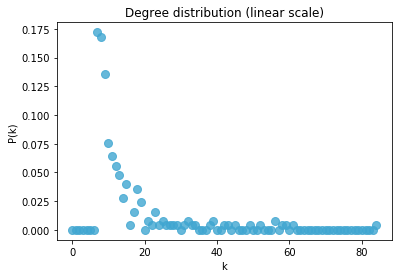

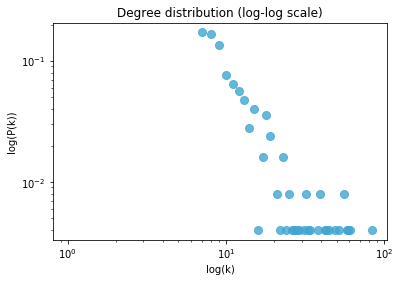

(None, None)

In [40]:
k_distrib(G), k_distrib(G, scale = 'log', fit_line = False)

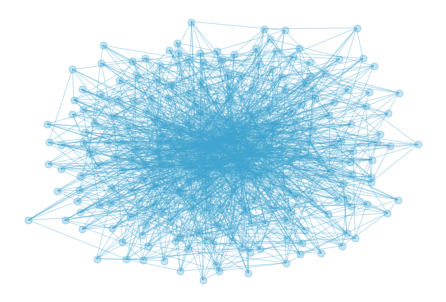

In [23]:
# Plot the network
nx.draw(G, alpha = .3, edge_color = COLOR, node_color = COLOR, node_size=50)